In [1]:
import numpy as np
import matplotlib.pyplot as pyplot

In [2]:
# OR Gate
x = np.array([[1, 1, 0, 0], [1, 0, 1, 0]]).T
y = np.array([1, 1, 1, 0]).reshape(-1, 1)

# AND Gate
x = np.array([[1, 1, 0, 0], [1, 0, 1, 0]]).T
y = np.array([1, 0, 0, 0]).reshape(-1, 1)

## 1 Layer Neural Network

In [3]:
## Initialize Paramters

def init_params(x, network_size = [1]):
    num_neurons = network_size
    w1 = np.random.randn(x.shape[1], num_neurons[0])
    b1 = np.random.randn(num_neurons[0])
    return w1, b1

In [4]:
## Forward Prop

def sigmoid(z):
    return 1/(1 + np.exp(-z))

def forward_prop(x, w1, b1):
    z1 = np.dot(x, w1) + b1
    yhat = sigmoid(z1)
    return yhat

In [5]:
## Backward Prop

learning_rate = 0.01

def derivative_sigmoid(z):
    return sigmoid(z)*(1 - sigmoid(z))

def back_prop(x, y, yhat, w1, b1):
    # Gradient Updates
    dl_wrt_yhat = -2*(y - yhat)
    dyhat_wrt_z1 = derivative_sigmoid(yhat)
    dz1_wrt_w1 = x

    # Gradient w1
    dl_wrt_w1 = np.dot(x.T, (dl_wrt_yhat*dyhat_wrt_z1))

    # Gradient b1
    dl_wrt_b1 = np.sum(dl_wrt_yhat*dyhat_wrt_z1)

    # Update w, b
    w1 -= learning_rate*dl_wrt_w1
    b1 -= learning_rate*dl_wrt_b1

    return w1, b1

In [10]:
n_iter = 10000
learning_rate = 0.01
loss = []

m, n = x.shape[1], x.shape[0] 
w1, b1 = init_params(x, network_size = [1])
for epoch in range(n_iter):
    yhat = forward_prop(x, w1, b1)
    loss.append(np.sum(np.square(y - yhat))/n)
    w1, b1 = back_prop(x, y, yhat, w1, b1)

<IPython.core.display.Javascript object>

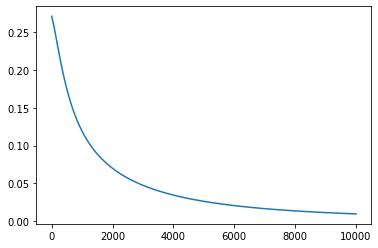

In [11]:
plt.plot(range(n_iter), loss)

In [12]:
forward_prop(x, w1, b1)

array([[0.85007276],
       [0.08945694],
       [0.08953627],
       [0.00170112]])

## 2 Layer Neural Network

In [13]:
## Initialize Paramters

def init_params(x, network_size = [3, 1]):
    num_neurons = network_size
    w1 = np.random.randn(x.shape[1], num_neurons[0])
    b1 = np.random.randn(num_neurons[0])

    w2 = np.random.randn(num_neurons[0], num_neurons[1])
    b2 = np.random.randn(num_neurons[1])

    return w2, b2, w1, b1

In [32]:
## Forward Prop
def sigmoid(z):
    return 1/(1 + np.exp(-z))

def forward_prop(x, w1, b1, w2, b2):
    z1 = np.dot(x, w1) + b1
    a1 = sigmoid(z1)

    z2 = np.dot(a1, w2) + b2
    yhat = sigmoid(z2)
    return yhat

In [33]:
## Backward Prop
learning_rate = 0.01

def derivative_sigmoid(z):
    return sigmoid(z)*(1 - sigmoid(z))

def back_prop(x, y, yhat, w1, b1, w2, b2):
    # Gradient Updates
    dl_wrt_yhat = -2*(y - yhat)
    dyhat_wrt_z2 = derivative_sigmoid(yhat)
    a1 = sigmoid(np.dot(x, w1) + b1)
    dz2_wrt_w2 = a1
    dz2_wrt_a1 = w2
    da1_wrt_z1 = derivative_sigmoid(a1)
    dz1_wrt_w1 = x

    # Gradient w2
    dl_wrt_w2 = np.dot(dz2_wrt_w2.T, (dl_wrt_yhat*dyhat_wrt_z2))

    # Gradient b2
    dl_wrt_b2 = np.sum(dl_wrt_yhat*dyhat_wrt_z2)

    # Gradient w1
    dl_wrt_a1 = np.dot(w2, (dl_wrt_yhat*dyhat_wrt_z2).T)
    dl_wrt_w1 = np.dot(x.T, (da1_wrt_z1*dl_wrt_a1.T))


    # Gradient b1
    dl_wrt_b1 = np.sum(np.dot(da1_wrt_z1, dl_wrt_a1))

    # Update w, b
    w2 -= learning_rate*dl_wrt_w2
    b2 -= learning_rate*dl_wrt_b2

    w1 -= learning_rate*dl_wrt_w1
    b1 -= learning_rate*dl_wrt_b1

    return w2, b2, w1, b1

In [56]:
# # OR Gate
# x = np.array([[1, 1, 0, 0], [1, 0, 1, 0]]).T
# y = np.array([1, 1, 1, 0]).reshape(-1, 1)

# AND Gate
x = np.array([[1, 1, 0, 0], [1, 0, 1, 0]]).T
y = np.array([1, 0, 0, 0]).reshape(-1, 1)

In [60]:
n_iter = 10000
learning_rate = 0.01
loss = []

m, n = x.shape[1], x.shape[0] 
w2, b2, w1, b1 = init_params(x, network_size = [3, 1])

for epoch in range(n_iter):
    yhat = forward_prop(x, w1, b1, w2, b2)
    loss.append(np.sum(np.square(y - yhat))/n)
    w2, b2, w1, b1 = back_prop(x, y, yhat, w1, b1, w2, b2)

<IPython.core.display.Javascript object>

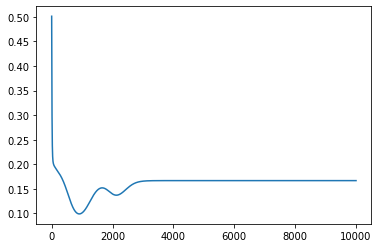

In [58]:
plt.plot(range(n_iter), loss)

In [59]:
forward_prop(x, w1, b1, w2, b2)

array([[0.33311099],
       [0.33311099],
       [0.33311099],
       [0.00083085]])